<a href="https://colab.research.google.com/github/zengin-enise/UrbanSoundClassification/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Urban Sounds Classification using CNN
* Dataset is exist in the website [URBANSOUND8K ](https://urbansounddataset.weebly.com/urbansound8k.html).

In [36]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /gdrive
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-6bcb8909ac2b>", line 3, in <module>
    get_ipython().run_line_magic('cd', '/gdrive')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2314, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 334, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshel

OSError: ignored

In [ ]:
!ls

MyDrive


In [ ]:
!ls "/gdrive/MyDrive/UrbanSoundClassification"

model.ipynb  preprocessing.ipynb  spectrograms	spectrograms_2	UrbanSound8K


In [37]:
import os
os.chdir("/gdrive/MyDrive/UrbanSoundClassification/")
audio_dir='UrbanSound8K/audio/'
image_dir='spectrograms/'

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import pandas as pd
from tqdm import tqdm # progress bar
import numpy as np
import os
import cv2

%matplotlib inline

###Dataset
Data is extracted from the drive.

In [ ]:
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
metadata.shape

(8732, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


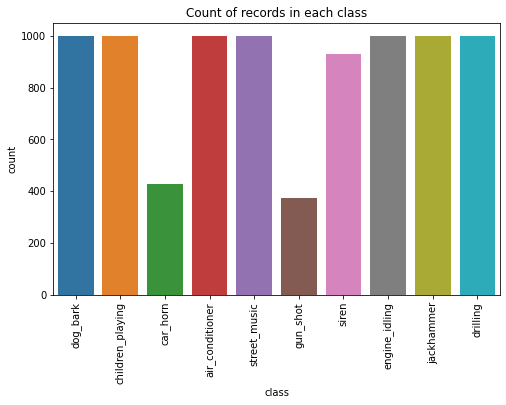

In [ ]:
# Check whether the dataset is imbalanced
plt.figure(figsize=(8, 5))
sns.countplot(metadata['class'])
plt.title("Count of records in each class")
plt.xticks(rotation="vertical")
plt.show()

Text(18.75, 0.5, 'Frequency')

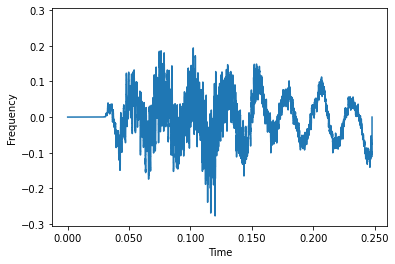

In [ ]:
# An audio sample from the third class
audio_file_path= audio_dir + 'fold2/4201-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
librosa.display.waveshow(librosa_audio_data, sr=librosa_sample_rate)
plt.xlabel("Time")
plt.ylabel("Frequency")

###Preprocessing

In [ ]:
def create_spectrogram(audio_file_path):

  audio_data, sample_rate=librosa.load(audio_file_path)
  spec = librosa.feature.melspectrogram(audio_data)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv


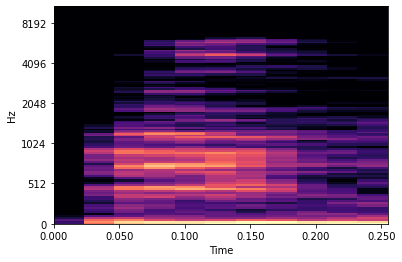

In [ ]:
  # Plot the transormed audio data (spectrogram)

spec = librosa.feature.melspectrogram(librosa_audio_data)
spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
img = librosa.display.specshow(spec_conv, 
                                 y_axis='mel', 
                                 x_axis='time', 
                                 sr=librosa_sample_rate, 
                                 ax=ax)


In [ ]:
# (index, Series)
for index_num, row in tqdm(metadata.iterrows()):
  audio_file_path = os.path.join(os.path.abspath(audio_dir),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))

  if os.path.exists(os.path.join(image_dir + 'fold'+ str(row["classID"]))) == False:
    try:
      os.mkdir(os.path.join(image_dir + 'fold'+ str(row["classID"])))
    except:
      print("Folder already found")
    
  image_file_path = os.path.join(os.path.abspath(image_dir),'fold'+str(row["classID"])+'/',str(row["slice_file_name"][0:-4]))
  spec_conv = create_spectrogram(audio_file_path)

  fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
  img = librosa.display.specshow(spec_conv, 
                                 y_axis='mel', 
                                 x_axis='time', 
                                 sr=librosa_sample_rate, 
                                 ax=ax)

  fig.savefig(image_file_path, bbox_inches='tight', pad_inches=0) # save the figure
  plt.close(fig)

3555it [37:47,  1.76it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
5480it [58:40,  1.76it/s]

In [ ]:
# Grayscale, Resize and Normalization of Images

extension = ".png"
images=[]

for index_num,row in tqdm(metadata.iterrows()):
  image_dir = image_dir+str(row["classID"])+'/'+str(row["slice_file_name"][0:-4])+extension

  image = cv2.imread(image_dir, cv2.IMREAD_GRAYSCALE) 
  resized_image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_AREA)
  image_norm = cv2.normalize(resized_image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX) 
    
  class_label=row["classID"]
  images.append((image_norm,class_label))

In [ ]:
# Convert list to Pandas dataframe
spec_dataset_df=pd.DataFrame(images,columns=['image','label'])

### Train-Test Split

In [ ]:
X = np.array(spec_dataset_df['image'].tolist())
y = np.array(spec_dataset_df['label'].tolist())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state = 42)
print("Number of training samples = ", x_train.shape[0])
print("Number of testing samples = ",x_test.shape[0])
print("Number of validation samples = ",x_val.shape[0])

In [ ]:
import pickle
with open("dataset/x_train.pickle","wb") as f:
    pickle.dump(x_train, f)
with open("dataset/x_test.pickle","wb") as f:
    pickle.dump(x_test, f)
with open("dataset/x_val.pickle","wb") as f:
    pickle.dump(x_val, f)
with open("dataset/y_train.pickle","wb") as f:
    pickle.dump(y_train, f)
with open("dataset/y_test.pickle","wb") as f:
    pickle.dump(y_test, f)
with open("dataset/y_val.pickle","wb") as f:
    pickle.dump(y_val, f)